<a href="https://www.kaggle.com/code/beyzacoban/kira-tahmin?scriptVersionId=189766127" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Bu çalışmada [antalya_kiralik_ev.csv](https://www.kaggle.com/antalyakiralyontem/antalya-kiralik-ev) verisi kullanılmıştır. Veri manipülasyonu, veri görselleştirme ve veri analizi yapmak için [pandas](https://pandas.pydata.org/) ve [seaborn](https://seaborn.pydata.org/) kütüphanelerini kullanılarak yapılmıştır.

## Kütüphaneleri Yükle ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Veri Setini Yükle ##

In [2]:
df=pd.read_csv("/kaggle/input/antalya-muratpaa-daire-kira-cretleri-2024-ocak/antalya_kiralik_ev.csv")

## Keşifsel Veri Analizi ##

In [3]:
df.head()

,Unnamed: 0,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,1,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,2,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,3,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,4,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
4,5,Çağlayan Mh.,37500.0,320.0,300.0,4+2,16-20 arası,8,8.0,Klima,3.0,1,1,Açık Otopark,0,1,0,37500,0


In [4]:
df.tail()

,Unnamed: 0,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
745,823,Güzeloba Mh.,16000.0,120.0,110.0,2+1,16-20 arası,2,3.0,Klima,1.0,1,1,Açık Otopark,0,0,250,16000,0
746,825,Soğuksu Mh.,25000.0,170.0,160.0,3+1,11-15 arası,11,17.0,Kombi (Doğalgaz),1.0,1,1,Açık & Kapalı Otopark,1,0,0,25000,0
747,826,Şirinyalı Mh.,30000.0,220.0,200.0,5+1,11-15 arası,12,13.0,Klima,2.0,1,1,Açık Otopark,0,0,0,30000,0
748,827,Muratpaşa Mh.,20000.0,70.0,65.0,2+1,5-10 arası,Çatı Katı,5.0,Kombi (Doğalgaz),1.0,1,1,Açık Otopark,1,0,500,20000,1
749,828,Güzeloba Mh.,17500.0,100.0,80.0,2+1,16-20 arası,1,4.0,Klima,2.0,1,0,Yok,1,0,300,25000,0


## Unnamed: 0 Kolonunu Sil ##

In [5]:
df=df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mahalle                 750 non-null    object 
 1   fiyat                   750 non-null    float64
 2   brut_alan_m2            750 non-null    float64
 3   net_alan_m2             750 non-null    float64
 4   oda_sayisi              750 non-null    object 
 5   bina_yas                750 non-null    object 
 6   dairenin_bulundugu_kat  750 non-null    object 
 7   bina_kat_sayisi         750 non-null    float64
 8   isitma_turu             750 non-null    object 
 9   banyo_sayisi            750 non-null    float64
 10  balkon                  750 non-null    int64  
 11  asansor                 750 non-null    int64  
 12  otopark                 750 non-null    object 
 13  esya_durumu             750 non-null    int64  
 14  site_icinde             750 non-null    in

In [7]:
df['mahalle'].value_counts(normalize=True)

mahalle
Güzeloba Mh.        0.217333
Çağlayan Mh.        0.086667
Fener Mah.          0.056000
Şirinyalı Mh.       0.054667
Kızılarık Mh.       0.046667
Meydankavağı Mh.    0.033333
Yeşilbahçe Mh.      0.030667
Bayındır Mh.        0.029333
Gençlik Mh.         0.022667
Gebizli Mah.        0.022667
Yüksekalan Mh.      0.022667
Konuksever Mah.     0.022667
Yenigün Mh.         0.020000
Muratpaşa Mh.       0.018667
Kızıltoprak Mh.     0.017333
Kışla Mh.           0.017333
Varlık Mh.          0.017333
Bahçelievler Mh.    0.016000
Soğuksu Mh.         0.016000
Deniz Mah.          0.016000
Üçgen Mh.           0.016000
Altındağ Mh.        0.014667
Sinan Mah.          0.014667
Etiler Mah.         0.013333
Sedir Mah.          0.012000
Çaybaşı Mh.         0.010667
Güvenlik Mh.        0.010667
Meltem Mah.         0.010667
Haşimişcan Mh.      0.009333
Zerdalilik Mah.     0.009333
Dutlubahçe Mh.      0.008000
Kızılsaray Mh.      0.008000
Güzelbağ Mh.        0.008000
Yeşildere Mh.       0.006667
Güzelo

## Veri Görselleştirme ##

<Axes: ylabel='Frequency'>

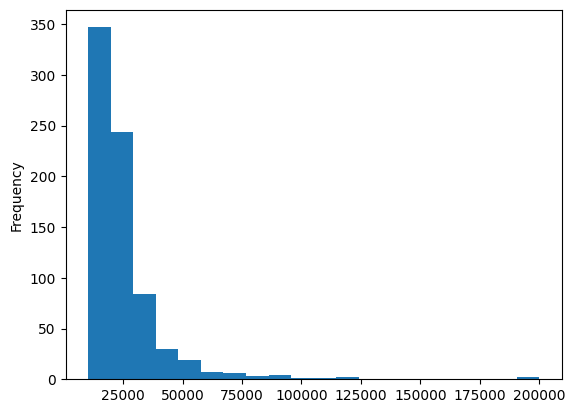

In [8]:
df['fiyat'].plot.hist(bins=20)

<Axes: ylabel='count'>

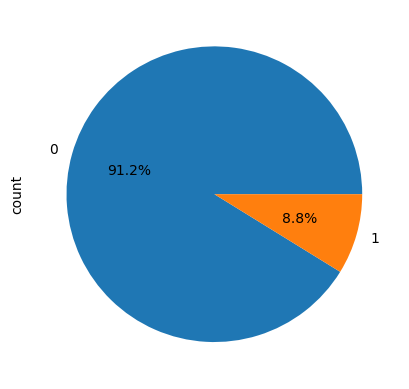

In [9]:
df['sahibi'].value_counts().plot(kind='pie',autopct='%1.1f%%',)

<Axes: ylabel='Frequency'>

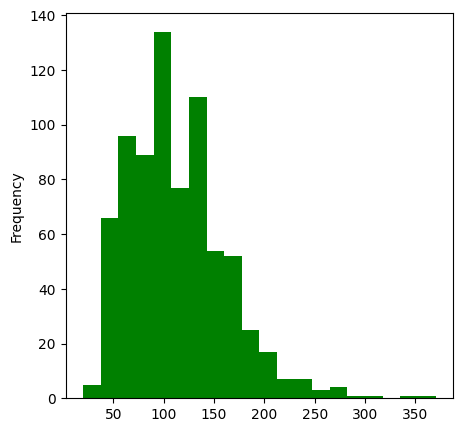

In [10]:
df['net_alan_m2'].plot(kind='hist',bins=20,figsize=(5,5),color='green')

<Axes: >

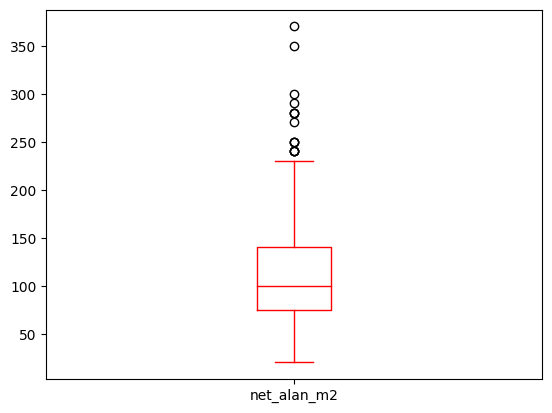

In [11]:
df['net_alan_m2'].plot(kind='box',color='red')

<Axes: xlabel='fiyat'>

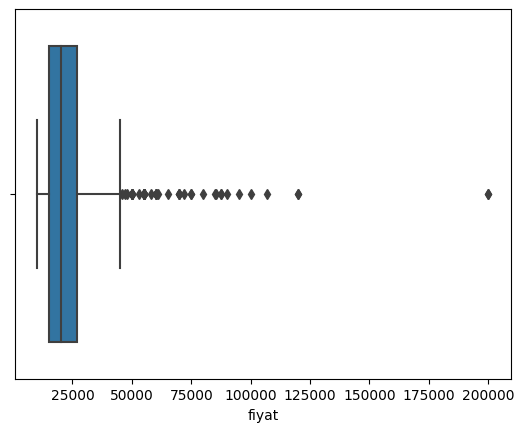

In [12]:
sns.boxplot(x='fiyat',data=df)

<Axes: xlabel='oda_sayisi'>

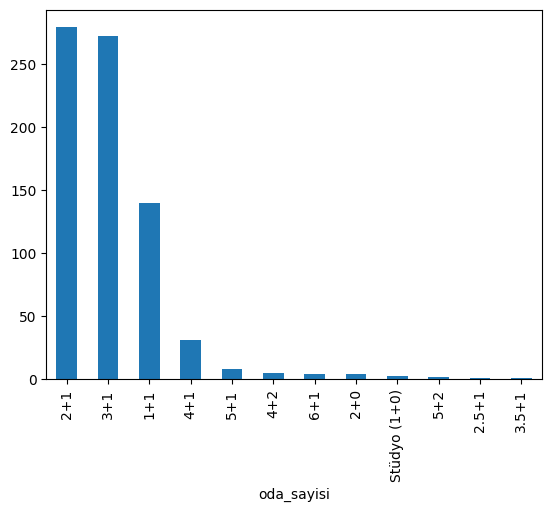

In [13]:
df['oda_sayisi'].value_counts().plot(kind='bar')

## Betimsel İstatistikler ##

In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mahalle,750,50,Güzeloba Mh.,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiyat,750.0,NaN,NaN,NaN,24260.117333,16680.292541,10250.0,15000.0,20000.0,27000.0,200000.0
brut_alan_m2,750.0,NaN,NaN,NaN,123.754667,53.26392,25.0,85.0,115.0,150.0,400.0
net_alan_m2,750.0,NaN,NaN,NaN,111.505333,48.517233,20.0,75.0,100.0,140.0,370.0
oda_sayisi,750,12,2+1,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bina_yas,750,11,5-10 arası,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dairenin_bulundugu_kat,750,22,2,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bina_kat_sayisi,750.0,NaN,NaN,NaN,5.204,2.959853,1.0,3.0,4.0,7.0,17.0
isitma_turu,750,13,Klima,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banyo_sayisi,750.0,NaN,NaN,NaN,1.28,0.52086,1.0,1.0,1.0,1.0,4.0


## Eksik Veri Kontrolü ##

In [15]:
df.isnull().sum()

mahalle                   0
fiyat                     0
brut_alan_m2              0
net_alan_m2               0
oda_sayisi                0
bina_yas                  0
dairenin_bulundugu_kat    0
bina_kat_sayisi           0
isitma_turu               0
banyo_sayisi              0
balkon                    0
asansor                   0
otopark                   0
esya_durumu               0
site_icinde               0
aidat                     0
depozito                  0
sahibi                    0
dtype: int64

<Axes: xlabel='isitma_turu'>

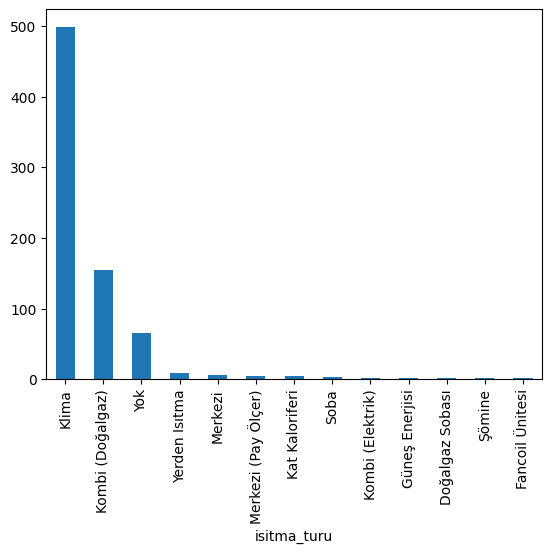

In [16]:
df['isitma_turu'].value_counts().plot.bar()

### Outlier Degerler

In [17]:
df_kor = df[['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_kat_sayisi', 'banyo_sayisi', 'aidat', 'depozito']]
outliers = df_kor.quantile(q=.99)
outliers

fiyat               88775.0
brut_alan_m2          300.0
net_alan_m2           260.2
bina_kat_sayisi        15.0
banyo_sayisi            3.0
aidat                3255.0
depozito           117550.0
Name: 0.99, dtype: float64

In [18]:
df_non_outliers=df[df['fiyat']<outliers['fiyat']]
df_non_outliers['fiyat'].max()

87500.0

In [19]:
df_non_outliers=df_non_outliers[df_non_outliers['fiyat']<outliers['fiyat']]

In [20]:
df_non_outliers=df_non_outliers[df_non_outliers['brut_alan_m2']<outliers['brut_alan_m2']]

In [21]:
df_non_outliers=df_non_outliers[df_non_outliers['net_alan_m2']<outliers['net_alan_m2']]

In [22]:
df_non_outliers=df_non_outliers[df_non_outliers['bina_kat_sayisi']<outliers['bina_kat_sayisi']]

In [23]:
df_non_outliers=df_non_outliers[df_non_outliers['banyo_sayisi']<outliers['banyo_sayisi']]

In [24]:
df_non_outliers=df_non_outliers[df_non_outliers['aidat']<outliers['aidat']]

In [25]:
df_non_outliers=df_non_outliers[df_non_outliers['depozito']<outliers['depozito']]

In [26]:
df_non_outliers.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mahalle,702,50,Güzeloba Mh.,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiyat,702.0,NaN,NaN,NaN,21866.934473,9721.09675,10250.0,15000.0,20000.0,25000.0,85250.0
brut_alan_m2,702.0,NaN,NaN,NaN,117.51567,44.058341,25.0,85.0,110.0,150.0,270.0
net_alan_m2,702.0,NaN,NaN,NaN,106.123932,41.179822,20.0,75.0,100.0,135.0,250.0
oda_sayisi,702,12,2+1,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bina_yas,702,11,5-10 arası,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dairenin_bulundugu_kat,702,21,1,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bina_kat_sayisi,702.0,NaN,NaN,NaN,4.960114,2.600582,1.0,3.0,4.0,6.0,14.0
isitma_turu,702,13,Klima,479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banyo_sayisi,702.0,NaN,NaN,NaN,1.212251,0.409193,1.0,1.0,1.0,1.0,2.0


In [27]:
df_non_outliers['sahibi'].dtype

dtype('int64')

In [28]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mahalle                 702 non-null    object 
 1   fiyat                   702 non-null    float64
 2   brut_alan_m2            702 non-null    float64
 3   net_alan_m2             702 non-null    float64
 4   oda_sayisi              702 non-null    object 
 5   bina_yas                702 non-null    object 
 6   dairenin_bulundugu_kat  702 non-null    object 
 7   bina_kat_sayisi         702 non-null    float64
 8   isitma_turu             702 non-null    object 
 9   banyo_sayisi            702 non-null    float64
 10  balkon                  702 non-null    int64  
 11  asansor                 702 non-null    int64  
 12  otopark                 702 non-null    object 
 13  esya_durumu             702 non-null    int64  
 14  site_icinde             702 non-null    int64  

### One Hot Encoding 

In [29]:
df_non_outliers['sahibi'] = df_non_outliers['sahibi'].astype("category")
df_non_outliers['asansor'] = df_non_outliers['asansor'].astype("category")
df_non_outliers['site_icinde'] = df_non_outliers['site_icinde'].astype("category")
df_non_outliers['esya_durumu'] = df_non_outliers['esya_durumu'].astype("category")
df_non_outliers['balkon'] = df_non_outliers['balkon'].astype("category")
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   mahalle                 702 non-null    object  
 1   fiyat                   702 non-null    float64 
 2   brut_alan_m2            702 non-null    float64 
 3   net_alan_m2             702 non-null    float64 
 4   oda_sayisi              702 non-null    object  
 5   bina_yas                702 non-null    object  
 6   dairenin_bulundugu_kat  702 non-null    object  
 7   bina_kat_sayisi         702 non-null    float64 
 8   isitma_turu             702 non-null    object  
 9   banyo_sayisi            702 non-null    float64 
 10  balkon                  702 non-null    category
 11  asansor                 702 non-null    category
 12  otopark                 702 non-null    object  
 13  esya_durumu             702 non-null    category
 14  site_icinde             702 non

<Axes: >

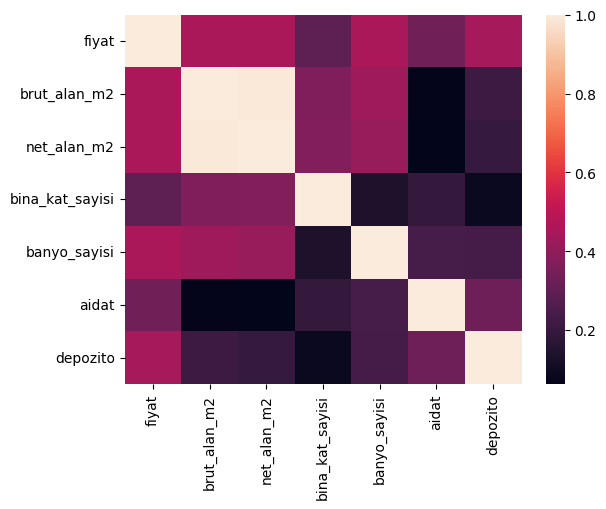

In [30]:
sns.heatmap(df_non_outliers.corr(numeric_only=True))

In [31]:
df_non_outliers

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
5,Kızılsaray Mh.,25000.0,140.0,130.0,3+1,26-30 arası,Giriş Altı Kot 2,10.0,Klima,1.0,1,1,Yok,1,0,0,50000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Yenigün Mh.,16000.0,115.0,110.0,2+1,11-15 arası,2,5.0,Klima,1.0,1,1,Açık Otopark,0,0,150,16000,0
745,Güzeloba Mh.,16000.0,120.0,110.0,2+1,16-20 arası,2,3.0,Klima,1.0,1,1,Açık Otopark,0,0,250,16000,0
747,Şirinyalı Mh.,30000.0,220.0,200.0,5+1,11-15 arası,12,13.0,Klima,2.0,1,1,Açık Otopark,0,0,0,30000,0
748,Muratpaşa Mh.,20000.0,70.0,65.0,2+1,5-10 arası,Çatı Katı,5.0,Kombi (Doğalgaz),1.0,1,1,Açık Otopark,1,0,500,20000,1


<Axes: xlabel='fiyat', ylabel='Count'>

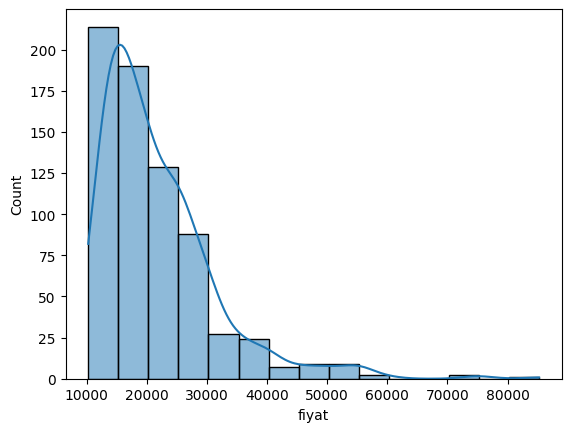

In [32]:
sns.histplot(df_non_outliers['fiyat'], bins=15, kde=True)

### Emlak sektöründeki bilgilere dayanarak ev özelliklerinin fiyata etkisi diğerlerine göre daha fazladır.

In [33]:
df_non_outliers['net_alan_m2']=df_non_outliers['net_alan_m2']**2
df_non_outliers['brut_alan_m2']=df_non_outliers['brut_alan_m2']**2
df_non_outliers['banyo_sayisi']=df_non_outliers['banyo_sayisi']**2

In [34]:
df_non_outliers

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,8100.0,6400.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,Çaybaşı Mh.,29000.0,21025.0,18225.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,Güzeloba Mh.,24750.0,21025.0,16900.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,Şirinyalı Mh.,30000.0,52900.0,40000.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,4.0,0,0,Açık Otopark,1,0,0,30000,0
5,Kızılsaray Mh.,25000.0,19600.0,16900.0,3+1,26-30 arası,Giriş Altı Kot 2,10.0,Klima,1.0,1,1,Yok,1,0,0,50000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Yenigün Mh.,16000.0,13225.0,12100.0,2+1,11-15 arası,2,5.0,Klima,1.0,1,1,Açık Otopark,0,0,150,16000,0
745,Güzeloba Mh.,16000.0,14400.0,12100.0,2+1,16-20 arası,2,3.0,Klima,1.0,1,1,Açık Otopark,0,0,250,16000,0
747,Şirinyalı Mh.,30000.0,48400.0,40000.0,5+1,11-15 arası,12,13.0,Klima,4.0,1,1,Açık Otopark,0,0,0,30000,0
748,Muratpaşa Mh.,20000.0,4900.0,4225.0,2+1,5-10 arası,Çatı Katı,5.0,Kombi (Doğalgaz),1.0,1,1,Açık Otopark,1,0,500,20000,1


## fiyat bilgisini çıkartıyoruz

In [35]:
X=df_non_outliers.drop('fiyat',axis=1)
y=df_non_outliers['fiyat']

## kategorik verileri sayısal verilere dönüştürmeliyiz


In [36]:
X=pd.get_dummies(X,drop_first=True)
X

,brut_alan_m2,net_alan_m2,bina_kat_sayisi,banyo_sayisi,aidat,depozito,mahalle_Bahçelievler Mh.,mahalle_Balbey Mah.,mahalle_Bayındır Mh.,mahalle_Cumhuriyet Mah.,...,isitma_turu_Yok,isitma_turu_Şömine,balkon_1,asansor_1,otopark_Açık Otopark,otopark_Kapalı Otopark,otopark_Yok,esya_durumu_1,site_icinde_1,sahibi_1
0,8100.0,6400.0,4.0,1.0,100,15000,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
1,21025.0,18225.0,5.0,1.0,1500,30000,False,False,False,False,...,False,False,True,True,False,True,False,False,True,False
2,21025.0,16900.0,4.0,1.0,500,25000,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
3,52900.0,40000.0,3.0,4.0,0,30000,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
5,19600.0,16900.0,10.0,1.0,0,50000,False,False,False,False,...,False,False,True,True,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,13225.0,12100.0,5.0,1.0,150,16000,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
745,14400.0,12100.0,3.0,1.0,250,16000,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
747,48400.0,40000.0,13.0,4.0,0,30000,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
748,4900.0,4225.0,5.0,1.0,500,20000,False,False,False,False,...,False,False,True,True,True,False,False,True,False,True


In [37]:
df_corr=df_non_outliers.corr(numeric_only=True).sort_values('fiyat', ascending=False)['fiyat'].head(10)
df_corr

fiyat              1.000000
brut_alan_m2       0.465838
banyo_sayisi       0.458527
net_alan_m2        0.457762
depozito           0.447219
aidat              0.334828
bina_kat_sayisi    0.289885
Name: fiyat, dtype: float64

In [38]:
df_non_outliers['aidat']=np.where(df_non_outliers['aidat']==0,0,1)
df_non_outliers['depozito']=np.where(df_non_outliers['depozito']==0,0,1)
df_non_outliers['otopark']=np.where(df_non_outliers['otopark']==0,0,1)
df_non_outliers['isitma_turu']=np.where(df_non_outliers['isitma_turu']==0,0,1)
df_non_outliers['sahibi']=np.where(df_non_outliers['sahibi']==0,0,1)

df_non_outliers

,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,Bayındır Mh.,15000.0,8100.0,6400.0,2+1,21-25 arası,Giriş Katı,4.0,1,1.0,0,0,1,1,0,1,1,0
1,Çaybaşı Mh.,29000.0,21025.0,18225.0,3+1,0,1,5.0,1,1.0,1,1,1,0,1,1,1,0
2,Güzeloba Mh.,24750.0,21025.0,16900.0,3+1,11-15 arası,3,4.0,1,1.0,1,0,1,0,0,1,1,1
3,Şirinyalı Mh.,30000.0,52900.0,40000.0,3+1,5-10 arası,2,3.0,1,4.0,0,0,1,1,0,0,1,0
5,Kızılsaray Mh.,25000.0,19600.0,16900.0,3+1,26-30 arası,Giriş Altı Kot 2,10.0,1,1.0,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Yenigün Mh.,16000.0,13225.0,12100.0,2+1,11-15 arası,2,5.0,1,1.0,1,1,1,0,0,1,1,0
745,Güzeloba Mh.,16000.0,14400.0,12100.0,2+1,16-20 arası,2,3.0,1,1.0,1,1,1,0,0,1,1,0
747,Şirinyalı Mh.,30000.0,48400.0,40000.0,5+1,11-15 arası,12,13.0,1,4.0,1,1,1,0,0,0,1,0
748,Muratpaşa Mh.,20000.0,4900.0,4225.0,2+1,5-10 arası,Çatı Katı,5.0,1,1.0,1,1,1,1,0,1,1,1


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def all_reg_models(X_train,X_test,y_train,y_test):
    # defined Models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "XGBoost": XGBRegressor(),
        "LightGBM": LGBMRegressor(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "KNeighborsRegressor":KNeighborsRegressor(),
        "SVR":SVR(),
        "MLPRegressor":MLPRegressor()
    }
    results = {}
    
    for name, model in models.items():
        # Modeli eğitme
        model.fit(X_train, y_train)
        # Test seti üzerinde tahmin yapma
        predictions = model.predict(X_test)
        # MSE ve R^2 değerlerini hesaplama
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)  # MSE'nin karekökünü alarak RMSE hesaplama
        r2 = r2_score(y_test, predictions)
        # Sonuçları saklama
        results[name] = (mse, rmse, r2)

    # Sonuçları yazdırma
    for name, (mse, rmse, r2) in results.items():
        print(f"{name}: Average RMSE: {rmse:.2f}")
        print(f"{name}: R2: {r2:.2f}")

    # En iyi modeli bulma (En düşük MSE'ye göre)
    best_model_name = min(results, key=lambda x: results[x][0])
    best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]
    print(50*"*")
    print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")


In [43]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   mahalle                 702 non-null    object  
 1   fiyat                   702 non-null    float64 
 2   brut_alan_m2            702 non-null    float64 
 3   net_alan_m2             702 non-null    float64 
 4   oda_sayisi              702 non-null    object  
 5   bina_yas                702 non-null    object  
 6   dairenin_bulundugu_kat  702 non-null    object  
 7   bina_kat_sayisi         702 non-null    float64 
 8   isitma_turu             702 non-null    int64   
 9   banyo_sayisi            702 non-null    float64 
 10  balkon                  702 non-null    category
 11  asansor                 702 non-null    category
 12  otopark                 702 non-null    int64   
 13  esya_durumu             702 non-null    category
 14  site_icinde             702 non

In [44]:
all_reg_models(X_train,X_test,y_train,y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 561, number of used features: 40
[LightGBM] [Info] Start training from score 21727.786096
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

## en iyi model olan xgboost, random forest ve lightgbm ile eğitiyoruz

In [45]:
from lightgbm import LGBMRegressor
lgbm_model=LGBMRegressor()
from sklearn.metrics import mean_squared_error, r2_score
lgbm_model.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred)**.5)

print('R2:',r2_score(y_test,y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 561, number of used features: 40
[LightGBM] [Info] Start training from score 21727.786096
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_model,
                                  param_distributions=param_dist,
                                  n_iter=10,  
                                  cv=3, 
                                  scoring='r2',
                                  n_jobs=-1,
                                  random_state=42)

sample_size = int(0.1 * len(X_train))  
X_train_sample = X_train[:sample_size]
y_train_sample = y_train[:sample_size]

random_search.fit(X_train_sample, y_train_sample)

print("Best Parameters: ", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Model - R2 Score: {r2:.2f}')
print(f'Random Forest Model - RMSE Score: {rmse:.2f}')


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Random Forest Model - R2 Score: 0.69
Random Forest Model - RMSE Score: 6111.31


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_model = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=xgb_model,
                                  param_distributions=param_dist,
                                  n_iter=100, 
                                  cv=5,
                                  scoring='r2',
                                  n_jobs=-1,
                                  random_state=42,
                                  verbose=1)
random_search.fit(X_train, y_train)
print("Best Parameters: ", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f'XGBoost Model - R2 Score: {r2_score(y_test, y_pred):.2f}')
print(f'XGBoost Model - RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
XGBoost Model - R2 Score: 0.69
XGBoost Model - RMSE Score: 6084.28
